In [34]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X, y = fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
    as_frame=False   # ensures numpy arrays instead of pandas
)

# Convert pixel values to a float type and scale them (optional, but recommended)
X = X.astype('float32') / 255.0
y = y.astype(int) # converting to int from str

# The data in sklearn is typically flattened (784 features per image)
# You might need to reshape it if using a model that expects 2D images.

# Split data into training and testing sets if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


c:\Users\Haruku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [35]:
print(X_train.shape, y_train.shape)

(52500, 784) (52500,)


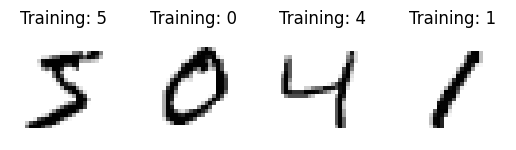

In [36]:
images_and_labels = list(zip(X, y))
for index, (data, label) in enumerate(images_and_labels[:4]):
    imgdim=int(np.sqrt(X[index].shape[0]))
    img=np.reshape(X[index],(imgdim,imgdim))
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r)
    plt.title(f'Training: {label}')

In [37]:
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# --------------------------------
# 2. Define Models
# --------------------------------

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        n_jobs=-1
    ),
    
    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",
        eval_metric="mlogloss",
        random_state=42
    ),
    
    # Tuned MLP (light tuning, no CV)
    "MLP": MLPClassifier(
        hidden_layer_sizes=(256, 256),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        learning_rate_init=0.001,
        max_iter=3000,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
    )
}


In [ ]:
from sklearn.metrics import accuracy_score

# --------------------------------
# 3. Train & Evaluate (may take 3-6 min for XGB)
# --------------------------------

results = []

for name, model in models.items():
    
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc
    })

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

print("\nModel Comparison:\n")
print(results_df)

Training Logistic Regression...
Training XGBoost...
Training MLP...

Model Comparison:

                 Model  Accuracy
2                  MLP  0.977600
1              XGBoost  0.975429
0  Logistic Regression  0.921714


In [ ]:
# try another: took me 5 min
xgb = XGBClassifier(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.1,
        random_state=42
    )
xgb.fit(X_train, y_train)


In [ ]:
xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc) # took far longer than MLP but the performance was still indifferent!

0.9776
